<a href="https://colab.research.google.com/github/shathatalalALsulime/Data-analysis-projects/blob/main/Copy_of_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [239]:
#Read files
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
category_translation_df = pd.read_csv('product_category_name_translation.csv')

In [240]:
# Delete duplicate files
order_items_df = order_items_df.drop_duplicates()
orders_df = orders_df.drop_duplicates()
products_df = products_df.drop_duplicates()
category_translation_df = category_translation_df.drop_duplicates()

In [228]:
# Display basic information about each DataFrame
print("Order Items DataFrame:")
order_items_df.info()
order_items_df.head()

Order Items DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [229]:
# Display information about each DataFrame
print("\nOrders DataFrame:")
orders_df.info()
orders_df.head()


Orders DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [230]:
# Display information about each DataFrame
print("\nProducts DataFrame:")
products_df.info()
products_df.head()


Products DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [241]:
# Display information about each DataFrame
print("\nCategory Translation DataFrame:")
category_translation_df.info()
category_translation_df.head()


Category Translation DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [242]:
# Convert date column to datetime type
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Add year, month and day columns
orders_df['year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['day'] = orders_df['order_purchase_timestamp'].dt.day

# Display new information
print("Orders DataFrame with Year, Month, and Day columns:")
print(orders_df[['order_purchase_timestamp', 'year', 'month', 'day']].head())

Orders DataFrame with Year, Month, and Day columns:
  order_purchase_timestamp  year  month  day
0      2017-10-02 10:56:33  2017     10    2
1      2018-07-24 20:41:37  2018      7   24
2      2018-08-08 08:38:49  2018      8    8
3      2017-11-18 19:28:06  2017     11   18
4      2018-02-13 21:18:39  2018      2   13


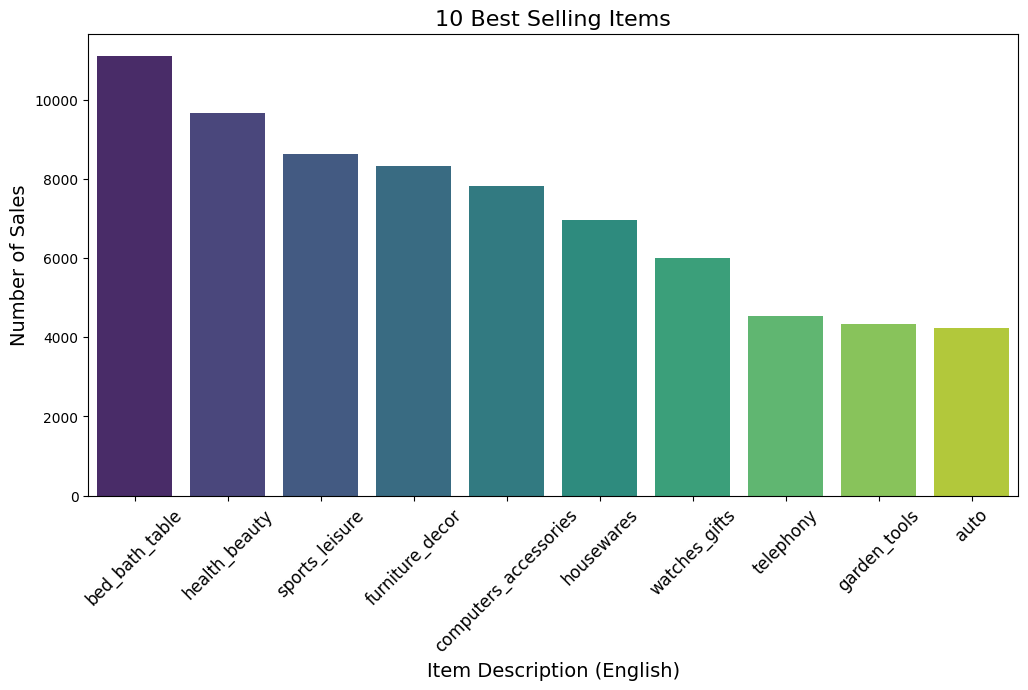

In [243]:
# Merge item data with product data
data = pd.merge(order_items_df, products_df[['product_id', 'product_category_name']], on='product_id')


# Merge with translation file to get names in English
data = pd.merge(data, category_translation_df, left_on='product_category_name', right_on='product_category_name', how='left')

# Prepare data to display the top 10 selling items in English
top_items = data['product_category_name_english'].value_counts()[:10]

# Draw the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')
plt.xticks(size=12, rotation=45)
plt.title('10 Best Selling Items', size=16)
plt.xlabel('Item Description (English)', size=14)
plt.ylabel('Number of Sales', size=14)
plt.show()

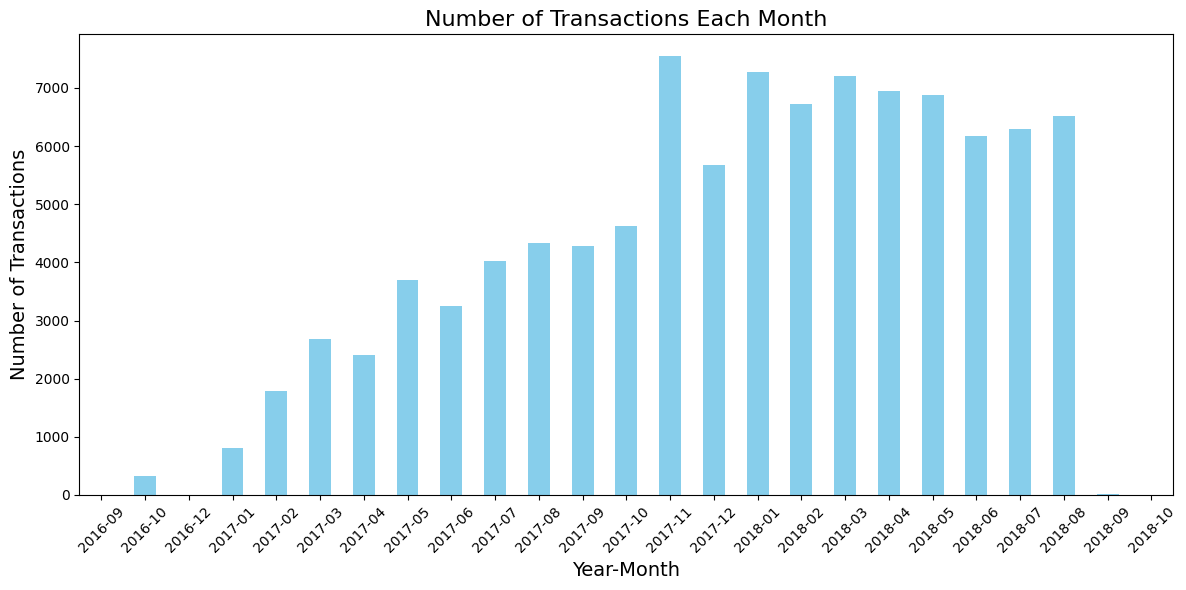

In [244]:
# Add column for month and year
orders_df['year_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Calculate the number of transactions for each month
monthly_transactions = orders_df['year_month'].value_counts().sort_index()

# Draw the graph
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions Each Month', size=16)
plt.xlabel('Year-Month', size=14)
plt.ylabel('Number of Transactions', size=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [288]:
# Add date data to the date
orders_df['date'] = orders_df['order_purchase_timestamp'].dt.date
orders_df['Date'] = pd.to_datetime(orders_df['date'])

In [289]:
# Merge data to get item details with orders
data = pd.merge(order_items_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id')
data = pd.merge(data, products_df[['product_id', 'product_category_name']], on='product_id')
data = pd.merge(data, category_translation_df, left_on='product_category_name', right_on='product_category_name', how='left')

# Rename the column for order date
data.rename(columns={'order_purchase_timestamp': 'Date'}, inplace=True)

# Count the number of items for each product category on each date
item_count = data.groupby(['Date', 'product_category_name_english'])['product_id'].count().reset_index(name='Count')

# Show first 5 results
item_count.head()

,Date,product_category_name_english,Count
0,2016-09-04 21:15:19,furniture_decor,2
1,2016-09-05 00:15:34,telephony,1
2,2016-09-15 12:16:38,health_beauty,3
3,2016-10-02 22:07:52,baby,1
4,2016-10-03 09:44:50,watches_gifts,1


In [290]:
# Add a column for transactions
item_count['Translation'] = item_count.groupby(['product_category_name_english', 'Date'])['Count'].ngroup() + 1

# Show first 5 results
item_count.head()

,Date,product_category_name_english,Count,Translation
0,2016-09-04 21:15:19,furniture_decor,2,37549
1,2016-09-05 00:15:34,telephony,1,84093
2,2016-09-15 12:16:38,health_beauty,3,47956
3,2016-10-02 22:07:52,baby,1,4903
4,2016-10-03 09:44:50,watches_gifts,1,92175


In [291]:
# Count the number of items for each product category on each date
item_count = data.groupby(['Date', 'product_category_name_english', 'product_id'])['product_id'].count().reset_index(name='Count')

# Add a column for transactions
item_count['Transaction'] = item_count.groupby(['product_category_name_english', 'Date'])['Count'].ngroup() + 1

# Show first 5 results
item_count.head()

,Date,product_category_name_english,product_id,Count,Transaction
0,2016-09-04 21:15:19,furniture_decor,c1488892604e4ba5cff5b4eb4d595400,1,37549
1,2016-09-04 21:15:19,furniture_decor,f293394c72c9b5fafd7023301fc21fc2,1,37549
2,2016-09-05 00:15:34,telephony,f3c2d01a84c947b078e32bbef0718962,1,84093
3,2016-09-15 12:16:38,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,3,47956
4,2016-10-02 22:07:52,baby,d2998d7ced12f83f9b832f33cf6507b6,1,4903


In [299]:
item_count_sample = item_count.sample(frac=0.8)  # Take 80% of the data
# Create a pivot table
item_count_pivot = item_count_sample.pivot_table(index='product_id', columns='product_category_name_english', values='Count', aggfunc='sum').fillna(0)

item_count_pivot.to_csv('product_category_name_english.csv')

# Display the first 5 results from the pivot table
item_count_pivot.head()

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
product_id,,,,,,,,,,,,,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [300]:
# Convert values ​​to int32
item_count_pivot = item_count_pivot.astype('int32')

# Display the first 5 results from the pivot table
item_count_pivot.head()

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
product_id,,,,,,,,,,,,,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00088930e925c41fd95ebfe695fd2655,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0009406fd7479715e4bef61dd91f2462,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
000b8f95fcb9e0096488278317764d19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000d9be29b5207b54e86aa1b1ac54872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [301]:
# Prepare data for the basket
basket_encoded = pd.read_csv('product_category_name_english.csv')
basket = item_count_sample.groupby('product_id')['product_category_name_english'].apply(list).reset_index()
basket_encoded = basket['product_category_name_english'].str.join('|').str.get_dummies('|')


# Display the first 5 results
basket.head()

# Display the first 5 results
basket_encoded.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [302]:
basket

,product_id,product_category_name_english
0,00066f42aeeb9f3007548bb9d3f33c38,[perfumery]
1,00088930e925c41fd95ebfe695fd2655,[auto]
2,0009406fd7479715e4bef61dd91f2462,[bed_bath_table]
3,000b8f95fcb9e0096488278317764d19,[housewares]
4,000d9be29b5207b54e86aa1b1ac54872,[watches_gifts]
...,...,...
28210,fff6177642830a9a94a0f2cba5e476d1,"[cool_stuff, cool_stuff]"
28211,fff81cc3158d2725c0655ab9ba0f712c,[health_beauty]
28212,fff9553ac224cec9d15d49f5a263411f,[fashion_bags_accessories]
28213,fffdb2d0ec8d6a61f0a0a0db3f25b441,"[computers_accessories, computers_accessories,..."


In [303]:
# Replace any value that is not between 0 and 1 with 0
basket_encoded = basket_encoded.applymap(lambda x: 1 if x == 1 else 0)

# Show results
basket_encoded.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [319]:
# Implement the FP-Growth algorithm
frequent_itemsets_fp = fpgrowth(basket_encoded, min_support=0.000001, use_colnames=True)

# Display recurring items with highest support
frequent_itemsets_fp.sort_values('support', ascending=False).head(10)


,support,itemsets
2,0.093780,(bed_bath_table)
13,0.088428,(sports_leisure)
7,0.080666,(furniture_decor)
8,0.076023,(health_beauty)
3,0.072373,(housewares)
1,0.057345,(auto)
10,0.051249,(computers_accessories)
11,0.044267,(toys)
4,0.041326,(watches_gifts)
23,0.035726,(telephony)


In [320]:
top_items = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=0.5)
top_items[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head()

,antecedents,consequents,support,confidence,lift
